Step Function
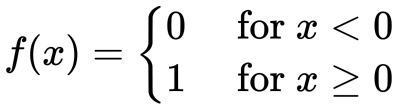

Sigmoid

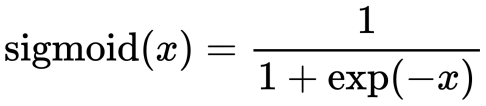

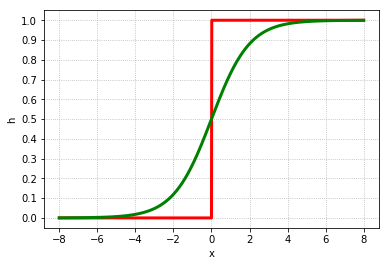

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x):
    return 1/(1+np.exp(-x))

def binarystep(x):
    return x>0

x = np.linspace(-8,8,1001)
plt.gca(yticks=np.linspace(0,1,11),xlabel='x',ylabel='h')
plt.plot(x,binarystep(x),'r',lw=3)
plt.plot(x,sigmoid(x),'g',lw=3)
plt.grid(ls=':')
plt.show()

In [5]:
x = np.linspace(-1,1,20)
x

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

### Gradient


AND GATE

In [8]:
# Acitivation Fuction
def sigmoid(x):
    return 1/(1+np.exp(-x))
# Loss Function
def ha_entropy(z,h):
    return -(z*np.log(h)+(1-z)*np.log(1-h))

In [9]:
# คำตอบของเกต AND
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
z = np.array([0,0,0,1])

w = np.array([0,0.]) # พารามิเตอร์ตั้งต้น
b = 0
n = len(z) # จำนวนข้อมูล
eta = 0.8 # อัตราการเรียนรู้
times = 250
entropy = []
for o in range(times):
    for i in range(n):
        ai = np.dot(X[i],w) + b
        hi = sigmoid(ai)
        gai = hi-z[i]
        gwi = gai*X[i]
        gbi = gai
        w -= eta*gwi # ปรับค่าพารามิเตอร์
        b -= eta*gbi
        J = ha_entropy(z[i],hi) # คำนวณค่าเสียหายเก็บไว้
        entropy.append(J)

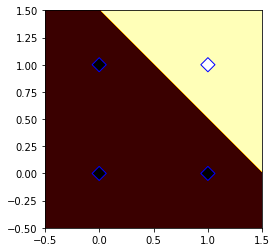

In [12]:
# วาดแสดงการแบ่งพื้นที่
mx,my = np.meshgrid(np.linspace(-0.5,1.5,200),np.linspace(-0.5,1.5,200))
mX = np.array([mx.ravel(),my.ravel()]).T
mh = np.dot(mX,w) + b
mz = (mh>=0).astype(int).reshape(200,-1)
plt.gca(aspect=1)
plt.contourf(mx,my,mz,cmap='hot')
plt.scatter(X[:,0],X[:,1],100,c=z,edgecolor='b',marker='D',cmap='gray')
plt.show()

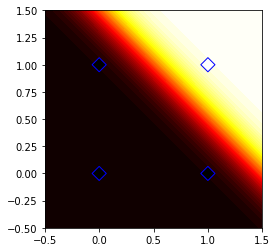

In [13]:
mz = sigmoid(mh).reshape(200,-1)
plt.gca(aspect=1)
plt.contourf(mx,my,mz,50,cmap='hot')
plt.scatter(X[:,0],X[:,1],100,c=z,edgecolor='b',marker='D',cmap='gray')
plt.show()

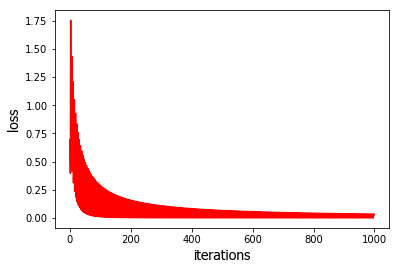

In [14]:
plt.plot(entropy,'r')
plt.xlabel(u'iterations',family='tahoma',size=14)
plt.ylabel(u'loss',family='tahoma',size=14)
plt.show()

In [15]:
!open .